In [11]:
import pandas as pd


In [12]:
df = pd.read_csv("heights.csv")
df.head()

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9


# outliers using percentile

In [13]:
max_thresold = df['height'].quantile(0.95)
max_thresold

9.689999999999998

In [14]:
df[df['height']>max_thresold]


,name,height
9,imran,14.5


In [15]:
min_thresold = df['height'].quantile(0.05)
min_thresold

3.6050000000000004

In [16]:
df[df['height']<min_thresold]


,name,height
12,yoseph,1.2


# Remove outliers

In [17]:
df[(df['height']<max_thresold) & (df['height']>min_thresold)]


,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
10,jose,6.1


In [18]:
import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_csv("heights.csv")
z_scores = np.abs(stats.zscore(df['height']))

threshold = 3

outliers = df[z_scores > threshold]
print("Outliers:\n", outliers)
df_clean = df[z_scores <= threshold]
print("Data without outliers:\n", df_clean.head())


Outliers:
     name  height
9  imran    14.5
Data without outliers:
     name  height
0  mohan     5.9
1  maria     5.2
2  sakib     5.1
3    tao     5.5
4  virat     4.9


# Using IQR

In [22]:
Q1 = df['height'].quantile(0.25)
Q3 = df['height'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['height'] < lower_bound) | (df['height'] > upper_bound)]
print("Outliers:\n", outliers)
df_clean = df[(df['height'] >= lower_bound) & (df['height'] <= upper_bound)]
print("Data without outliers:\n", df_clean.head())


Outliers:
       name  height
9    imran    14.5
12  yoseph     1.2
Data without outliers:
     name  height
0  mohan     5.9
1  maria     5.2
2  sakib     5.1
3    tao     5.5
4  virat     4.9


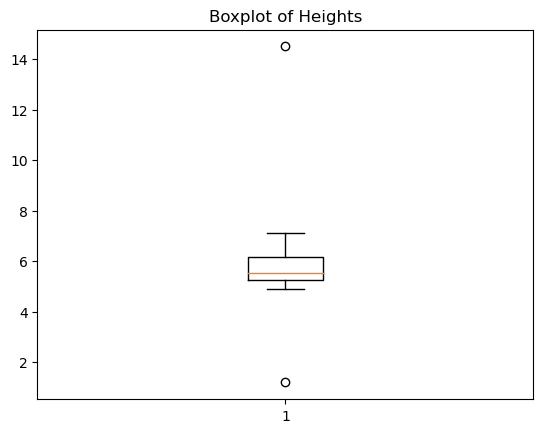

In [21]:
#Visualization 
import matplotlib.pyplot as plt
plt.boxplot(df['height'])
plt.title('Boxplot of Heights')
plt.show()
